<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%205/Modulo_5_Ejercicio_2_Regularizacion_L1_L2_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 2: Regularización L1 vs L2 — ¿cuándo usar cada una?**
**Explora cómo controlar el sobreajuste en modelos de regresión con Lasso y Ridge**

### **Introducción**
En este ejercicio aprenderemos a utilizar técnicas de regularización para mejorar modelos de regresión. Compararemos **L1 (Lasso)** y **L2 (Ridge)** y observaremos cómo afectan a los coeficientes del modelo y al rendimiento en validación.

La regularización es esencial para evitar el **sobreajuste**, especialmente cuando hay muchas variables o ruido en los datos. Evaluaremos también cuándo conviene usar L1, L2 o un modelo sin regularización.

In [2]:
# Celda 1: Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
sns.set(style='whitegrid')

In [3]:
# Celda 2: Cargar el dataset
url = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/durabilidad_piezas.csv'
df = pd.read_csv(url)
df.head()

,ID_pieza,Dureza_material,Espesor,Temperatura_fabricacion,Presion_molde,Velocidad_produccion,Tiempo_exposicion,Tratamiento_termico,Proveedor_material,Durabilidad
0,1,45.059218,4.737020,849.986582,375.016971,16,8.340820,Sí,C,14420.857305
1,2,47.718688,4.874542,775.627351,343.459912,45,3.667618,Sí,B,12054.034726
2,3,38.994733,2.816336,740.569892,222.519061,12,8.431119,No,B,5900.292775
3,4,59.172977,3.231814,841.921312,466.097462,11,6.604534,No,B,7876.068384
4,5,52.752826,3.686595,774.340835,185.566983,71,4.697800,Sí,A,16551.339649


In [4]:
# Celda 3: Preprocesamiento manual
# Eliminar ID y separar variables
X = df.drop(columns=['ID_pieza', 'Durabilidad'])
y = df['Durabilidad']

# Separar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

# Imputar valores numéricos
imputer = SimpleImputer(strategy='median')
X[num_cols] = imputer.fit_transform(X[num_cols])

# Codificar variables categóricas
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Celda 4: División en train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Celda 5: Entrenamiento de modelos Linear, Ridge y Lasso
modelos = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1000),
    'Lasso': Lasso(alpha=1000)
}
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    resultados[nombre] = {'MAE': mae, 'RMSE': rmse, 'coef': modelo.coef_}

# Mostrar métricas
pd.DataFrame(resultados).T[['MAE', 'RMSE']]

,MAE,RMSE
Linear,1588.420651,1995.917323
Ridge,1590.811426,1998.446476
Lasso,2123.94073,2650.470397


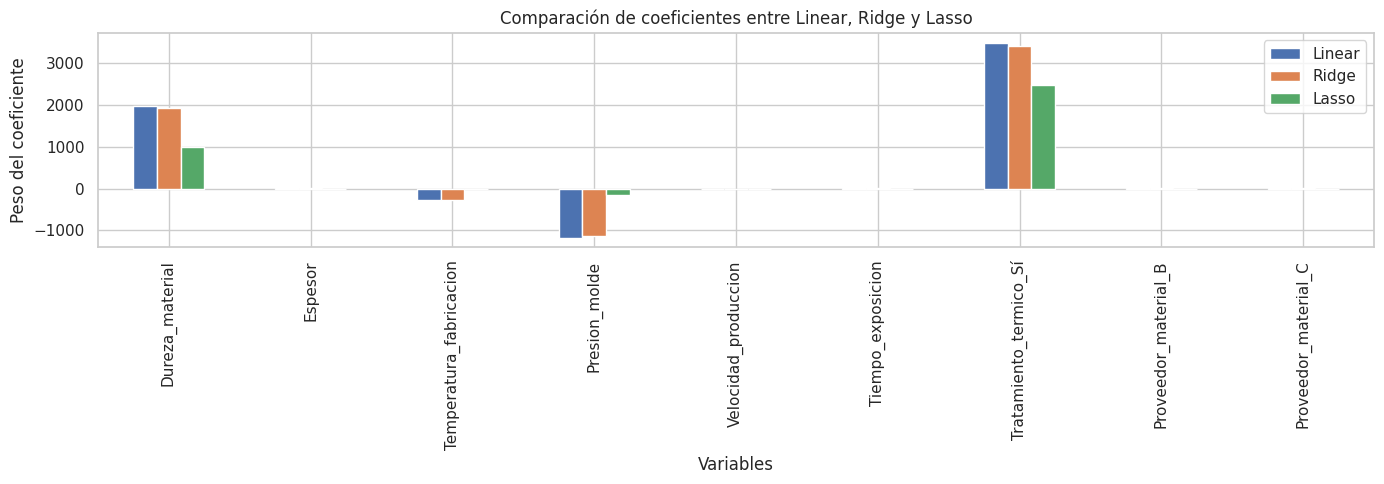

In [10]:
# Celda 6: Comparación de coeficientes
coefs_df = pd.DataFrame({k: v['coef'] for k, v in resultados.items()})
coefs_df.index = X.columns
coefs_df.plot(kind='bar', figsize=(14,5))
plt.title('Comparación de coeficientes entre Linear, Ridge y Lasso')
plt.xlabel('Variables')
plt.ylabel('Peso del coeficiente')
plt.tight_layout()
plt.show()

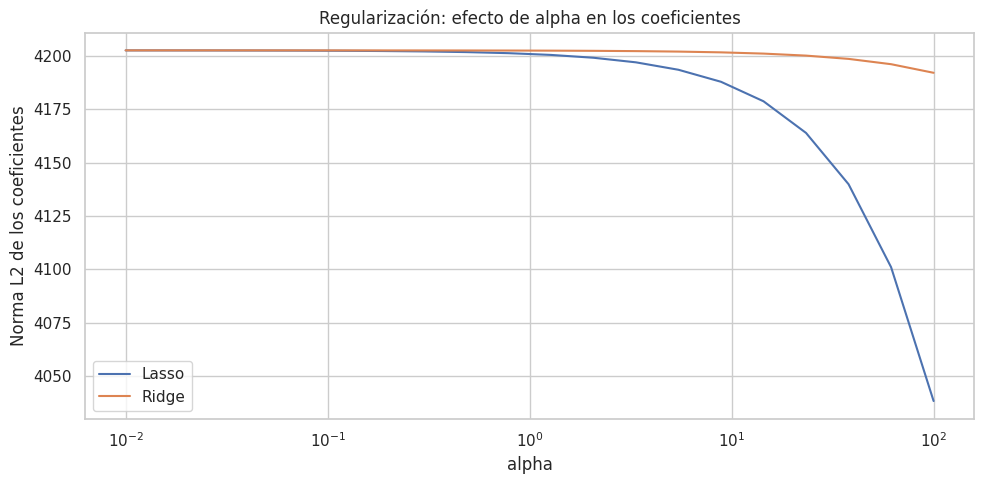

In [13]:
# Celda 7: Evolución de coeficientes con alpha
alphas = np.logspace(-2, 2, 20)
lasso_norms, ridge_norms = [], []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    ridge_norms.append(np.linalg.norm(ridge.coef_))
plt.figure(figsize=(10,5))
plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Norma L2 de los coeficientes')
plt.title('Regularización: efecto de alpha en los coeficientes')
plt.legend()
plt.tight_layout()
plt.show()

### **Conclusiones**
- La regresión lineal sin regularización puede sobreajustar en presencia de ruido o multicolinealidad.
- **Ridge** reduce la magnitud de los coeficientes sin eliminarlos.
- **Lasso** puede eliminar completamente variables, útil para simplificar el modelo.
- El hiperparámetro `alpha` permite ajustar el grado de regularización.

**Preguntas para reflexionar:**
- ¿Cuál modelo ofrece mejor rendimiento general?
- ¿Cuál sería más útil si necesitas un modelo explicable y compacto?
- ¿Cómo automatizarías la búsqueda del mejor `alpha`?